In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')

In [ ]:
data.head(10)

,ID,Y
0,1,3.0187
1,2,2.7349
2,3,3.0292
3,4,3.6002
4,5,3.5030
5,6,2.4798
6,7,2.4132
7,8,1.9625
8,9,2.1013
9,10,2.1049


In [ ]:
# Showing The Available Labels
list(data)

['ID', 'Y']

In [ ]:
# Identifying Train-test Samples & Preprocess
data['Y'] = pd.to_numeric(data['Y'], errors='coerce')
data['Y'].replace(999, np.nan, inplace=True)

# Identify the train set
train_df = data[data['ID'] <= 600].copy()
train_df['Y'].fillna(method='ffill', inplace=True)
data.update(train_df)

# Identify the test set
test_df = data[data['ID'] > 600]

# Optionally, save the train and test sets to new CSV files
train_df.to_csv('train_set.csv', index=False)
test_df.to_csv('test_set.csv', index=False)

print("Train set, Evaluate set and test set have been separated and saved.")

Train set, Evaluate set and test set have been separated and saved.


In [ ]:
print('Trainset Data frame:')
train_df.head()

Trainset Data frame:


,ID,Y
0,1,3.0187
1,2,2.7349
2,3,3.0292
3,4,3.6002
4,5,3.5030


In [ ]:
print('Testset Data frame:')
test_df.head()

Testset Data frame:


,ID,Y
600,601,NaN
601,602,NaN
602,603,NaN
603,604,NaN
604,605,NaN


In [ ]:
# Installing Necessary libraries
!pip install statsmodels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Calculate the ACF values
acf_values = acf(train_df['Y'], nlags=100)

# Calculate the PACF values
pacf_values = pacf(train_df['Y'], nlags=100)

# The acf_values and pacf_values are arrays with the correlation coefficients
# Corresponding to each lag from 0 up to 40

# To display the values, we can print them or store them as needed
print('ACF Values:', acf_values)
print('PACF Values:', pacf_values)

ACF Values: [ 1.00000000e+00 -2.50131924e-01  6.09623004e-01 -4.97581432e-01
  2.34907698e-01 -5.91555286e-01  1.29278016e-01 -4.23366562e-01
  1.89391939e-01 -1.47126350e-01  2.95023680e-01 -1.16814465e-03
  1.64102125e-01 -6.07703552e-02 -7.08619856e-03 -6.74131840e-02
 -8.35532665e-02 -1.42803660e-03 -8.71829221e-02  1.40478499e-01
 -8.09120549e-02  1.98844285e-01 -1.92020926e-01  1.81064548e-01
 -2.63583182e-01  2.26613743e-01 -2.71927243e-01  2.83316074e-01
 -2.50929478e-01  3.07387789e-01 -1.99440791e-01  2.58040424e-01
 -2.10771751e-01  1.78207471e-01 -1.79487253e-01  1.20723673e-01
 -1.34278706e-01  7.18280580e-02 -1.03203225e-01  3.22578493e-02
 -3.17468441e-02 -1.10783588e-02  1.51775478e-02 -4.56765948e-02
  9.62676590e-02 -5.04901796e-02  1.37797820e-01 -1.08248464e-01
  1.18846773e-01 -2.04782827e-01  1.31673156e-01 -2.12182874e-01
  1.92128480e-01 -1.76320655e-01  2.51025753e-01 -1.12052203e-01
  2.54850349e-01 -1.11423530e-01  1.36275424e-01 -1.49728235e-01
  1.77864078e

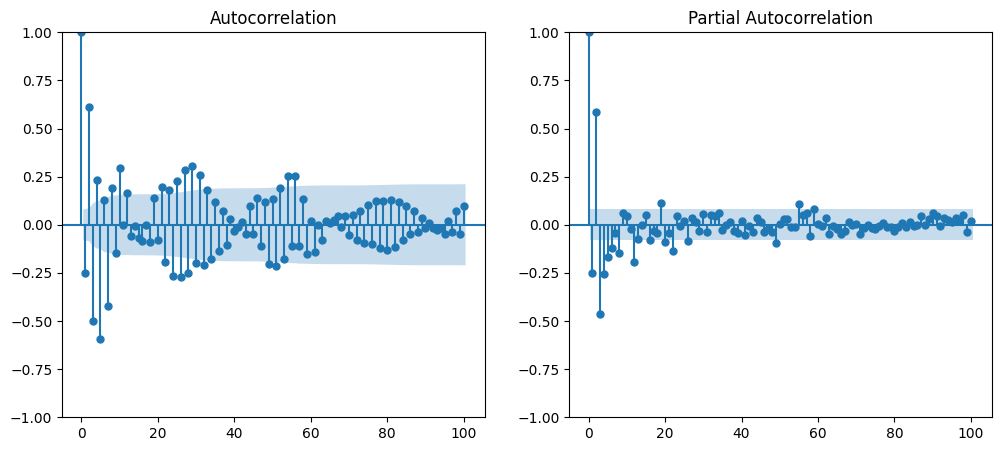

In [ ]:
# Also Ploting ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the ACF
plot_acf(train_df['Y'], lags=100, ax=axes[0])

# Plot the PACF
plot_pacf(train_df['Y'], lags=100, ax=axes[1])

plt.show()

The above image shows two plots: the Autocorrelation Function (ACF) plot and the Partial Autocorrelation Function (PACF) plot. These plots are crucial tools in time series analysis, especially for identifying the appropriate orders of ARIMA models (which include AR, MA, and combined ARMA models). Here’s what each plot represents and how to interpret them:

### Autocorrelation Function (ACF)
- **Purpose**: Shows the correlation of the series with itself at different lags.
- **Interpretation**:
  - **ACF Plot on the Left**: The autocorrelations decrease gradually and alternate in sign. This pattern suggests a mixed ARMA process because pure AR or MA processes have more specific decay or truncation patterns. The slow decay indicates that future values have some correlation with past values over extended lags.
  - **Significance**: The blue shaded area represents the confidence interval (usually 95%). If the autocorrelations are within this band, they are not statistically significant; those extending beyond this band are significant.

### Partial Autocorrelation Function (PACF)
- **Purpose**: Shows the correlation of the series with its own lagged values, controlling for the values of the time series at all shorter lags (it isolates the correlation at each lag).
- **Interpretation**:
  - **PACF Plot on the Right**: The significant spike at lag 1 followed by autocorrelations that mostly fall within the confidence interval suggests an AR(1) component could be a strong candidate. The rapid decline after the first lag in PACF typically indicates the number of autoregressive terms needed in an AR process.
  
### Analyzing the Series:
- **Potential Model**: Given the significant initial lag in the PACF and the pattern in the ACF, an ARMA model is likely necessary. The AR(1) component is suggested by the PACF. The ACF suggests additional MA terms might be needed due to the complex pattern and slow decay, indicating multiple past values influencing the current value beyond what an AR model alone would capture.
- **Choosing ARMA Orders**: We would start by considering an AR(1) model based on the PACF. However, given the ACF’s slower decay and oscillation, adding MA components would help model the autocorrelation structure not captured by the AR component alone. The exact number of MA terms would require further testing, possibly starting with low orders and incrementally testing higher orders while checking the model's AIC/BIC and diagnostic checks.

### Next Steps:
- **Fit Models**: Start with AR(1) and incrementally add MA terms, each time evaluating the model's performance via statistical criteria (like AIC/BIC) and checking residuals for any autocorrelation.
- **Check Residuals**: For any fitted model, always check that the residuals are approximately white noise—this means they should show no pattern in ACF and PACF plots, have a mean close to zero, and constant variance.

These tools are fundamental in guiding the initial choices for the parameters of ARIMA-type models, which are crucial for effective and efficient forecasting in time series analysis.

In [ ]:
# Evaluating a range of p and q to select the best model
# Assuming 'train_df' and 'Y' are correctly set up
y = train_df['Y']

# Dictionary to store models and their AIC/BIC values
model_dict = {}

# File to store the evaluations
with open('model_evaluations.txt', 'w') as file:
    file.write("p, q, AIC, BIC\n")  # Header for the output file

    # Loop over p and q values
    for p in range(1, 10):  # p values from 1 to 10
        for q in range(1, 10):  # q values from 1 to 10
            try:
                # Fit the ARMA model
                model = ARIMA(y, order=(p, 0, q))
                result = model.fit()

                # Write the AIC and BIC values to the file
                file.write(f"{p}, {q}, {result.aic}, {result.bic}\n")

                # Store the model, AIC, and BIC in the dictionary
                model_dict[(p, q)] = {
                    'model': result,
                    'AIC': result.aic,
                    'BIC': result.bic
                }

                # Optionally print the summary to the console
                print(f"Model (p={p}, q={q}) fitted. AIC: {result.aic}, BIC: {result.bic}")
            except Exception as e:
                print(f"Failed to fit model (p={p}, q={q}): {str(e)}")

# At this point, 'model_dict' contains all the fitted models along with their AIC and BIC values,
# and 'model_evaluations.txt' contains the AIC and BIC values for each model.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=1, q=1) fitted. AIC: 1558.8415065327597, BIC: 1576.4292251536242
Model (p=1, q=2) fitted. AIC: 1405.4241222573087, BIC: 1427.4087705333893
Model (p=1, q=3) fitted. AIC: 1373.3935252847223, BIC: 1399.775103216019
Model (p=1, q=4) fitted. AIC: 1346.0038181548343, BIC: 1376.7823257413474
Model (p=1, q=5) fitted. AIC: 1320.4110039119669, BIC: 1355.5864411536961
Model (p=1, q=6) fitted. AIC: 1287.8703878128754, BIC: 1327.4427547098207
Model (p=1, q=7) fitted. AIC: 1274.017911190861, BIC: 1317.9872077430225
Model (p=1, q=8) fitted. AIC: 1275.9337179746074, BIC: 1324.299944181985
Model (p=1, q=9) fitted. AIC: 1263.6726828477215, BIC: 1316.4358387103152


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Model (p=2, q=1) fitted. AIC: 1403.415631210606, BIC: 1425.4002794866867
Model (p=2, q=2) fitted. AIC: 1374.2684636536062, BIC: 1400.6500415849032
Model (p=2, q=3) fitted. AIC: 1380.867127092668, BIC: 1411.645634679181
Model (p=2, q=4) fitted. AIC: 1336.4911488009875, BIC: 1371.6665860427167


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=2, q=5) fitted. AIC: 1272.6407976439577, BIC: 1312.213164540903


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=2, q=6) fitted. AIC: 1272.3141040981423, BIC: 1316.2834006503037


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=2, q=7) fitted. AIC: 1274.1672513869344, BIC: 1322.533477594312


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=2, q=8) fitted. AIC: 1276.12780755576, BIC: 1328.8909634183537


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=2, q=9) fitted. AIC: 1265.3406133281605, BIC: 1322.5006988459704
Model (p=3, q=1) fitted. AIC: 1260.2641150951374, BIC: 1286.6456930264344
Model (p=3, q=2) fitted. AIC: 1261.3484485431402, BIC: 1292.1269561296533
Model (p=3, q=3) fitted. AIC: 1262.6002666538734, BIC: 1297.7757038956026
Model (p=3, q=4) fitted. AIC: 1263.8100507882104, BIC: 1303.3824176851558
Model (p=3, q=5) fitted. AIC: 1264.6995293271866, BIC: 1308.668825879348
Model (p=3, q=6) fitted. AIC: 1264.7658859396633, BIC: 1313.132112147041
Model (p=3, q=7) fitted. AIC: 1246.455525995526, BIC: 1299.2186818581197
Model (p=3, q=8) fitted. AIC: 1241.7439658757116, BIC: 1298.9040513935215
Model (p=3, q=9) fitted. AIC: 1243.740136147508, BIC: 1305.297151320534
Model (p=4, q=1) fitted. AIC: 1261.1505007928756, BIC: 1291.9290083793887
Model (p=4, q=2) fitted. AIC: 1256.1277916875372, BIC: 1291.3032289292664


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=4, q=3) fitted. AIC: 1254.525369328996, BIC: 1294.0977362259414
Model (p=4, q=4) fitted. AIC: 1254.9793705682437, BIC: 1298.9486671204052


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=4, q=5) fitted. AIC: 1252.5580098058344, BIC: 1300.924236013212


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=4, q=6) fitted. AIC: 1262.611581162635, BIC: 1315.3747370252288
Model (p=4, q=7) fitted. AIC: 1244.0455572304438, BIC: 1301.2056427482537


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=4, q=8) fitted. AIC: 1244.9888501879136, BIC: 1306.5458653609396


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=4, q=9) fitted. AIC: 1228.6189943003267, BIC: 1294.5729391285688
Model (p=5, q=1) fitted. AIC: 1261.5107516460785, BIC: 1296.6861888878077
Model (p=5, q=2) fitted. AIC: 1253.5524792204922, BIC: 1293.1248461174375


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=5, q=3) fitted. AIC: 1264.8544236492803, BIC: 1308.8237202014418


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=5, q=4) fitted. AIC: 1265.2275477906521, BIC: 1313.5937739980297


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=5, q=5) fitted. AIC: 1249.0387890241773, BIC: 1301.801944886771


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=5, q=6) fitted. AIC: 1245.8580804635067, BIC: 1303.0181659813165


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=5, q=7) fitted. AIC: 1227.05272509002, BIC: 1288.609740263046


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=5, q=8) fitted. AIC: 1242.367613064846, BIC: 1308.321557893088


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=5, q=9) fitted. AIC: 1231.6828464305813, BIC: 1302.0337209140396
Model (p=6, q=1) fitted. AIC: 1261.9846039071015, BIC: 1301.5569708040468


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=6, q=2) fitted. AIC: 1255.5469506104869, BIC: 1299.5162471626484


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=6, q=3) fitted. AIC: 1244.094259352943, BIC: 1292.4604855603206


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=6, q=4) fitted. AIC: 1241.9984122665983, BIC: 1294.761568129192


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=6, q=5) fitted. AIC: 1246.8244667912866, BIC: 1303.9845523090964


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=6, q=6) fitted. AIC: 1232.1195825881268, BIC: 1293.6765977611528


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=6, q=7) fitted. AIC: 1228.4689409173443, BIC: 1294.4228857455864


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=6, q=8) fitted. AIC: 1227.3733629040853, BIC: 1297.7242373875436


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=6, q=9) fitted. AIC: 1229.5403410010936, BIC: 1304.288145139768
Model (p=7, q=1) fitted. AIC: 1262.5141832134907, BIC: 1306.4834797656522


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=7, q=2) fitted. AIC: 1251.1535097606434, BIC: 1299.519735968021


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=7, q=3) fitted. AIC: 1263.4201146126834, BIC: 1316.1832704752771


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=7, q=4) fitted. AIC: 1242.8098020776592, BIC: 1299.9698875954691


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=7, q=5) fitted. AIC: 1242.7370198778049, BIC: 1304.2940350508309


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=7, q=6) fitted. AIC: 1233.9730706555024, BIC: 1299.9270154837445


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=7, q=7) fitted. AIC: 1217.4358636848574, BIC: 1287.7867381683157


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=7, q=8) fitted. AIC: 1226.0528702489328, BIC: 1300.8006743876072


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=7, q=9) fitted. AIC: 1233.3174711008169, BIC: 1312.4622048947076
Model (p=8, q=1) fitted. AIC: 1260.5643372981085, BIC: 1308.9305635054861
Model (p=8, q=2) fitted. AIC: 1232.7424340689677, BIC: 1285.5055899315614


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=8, q=3) fitted. AIC: 1229.3663774159088, BIC: 1286.5264629337187


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=8, q=4) fitted. AIC: 1227.4620124951964, BIC: 1289.0190276682224


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=8, q=5) fitted. AIC: 1230.4537109587266, BIC: 1296.4076557869687


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=8, q=6) fitted. AIC: 1228.4831244431132, BIC: 1298.8339989265714


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=8, q=7) fitted. AIC: 1218.9751246401681, BIC: 1293.7229287788425


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=8, q=8) fitted. AIC: 1231.3782806018612, BIC: 1310.523014395752


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=8, q=9) fitted. AIC: 1234.9845571520157, BIC: 1318.5262206011225
Model (p=9, q=1) fitted. AIC: 1261.4037411505583, BIC: 1314.166897013152
Model (p=9, q=2) fitted. AIC: 1233.3404111128089, BIC: 1290.5004966306187


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=9, q=3) fitted. AIC: 1231.7330491994162, BIC: 1293.2900643724422


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=9, q=4) fitted. AIC: 1222.1295547973384, BIC: 1288.0834996255805


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=9, q=5) fitted. AIC: 1226.821268221047, BIC: 1297.1721427045052


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model (p=9, q=6) fitted. AIC: 1220.8575313411188, BIC: 1295.6053354797932


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=9, q=7) fitted. AIC: 1223.3000502799114, BIC: 1302.444784073802


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model (p=9, q=8) fitted. AIC: 1225.4046707615285, BIC: 1308.9463342106353
Model (p=9, q=9) fitted. AIC: 1225.3916791895927, BIC: 1313.3302722939156


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


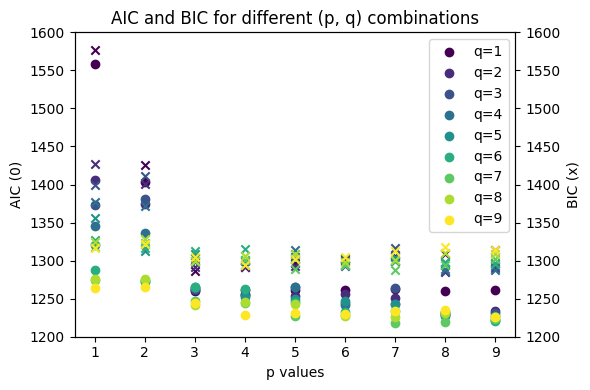

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Lists to store the values for plotting
p_values = []
q_values = []
aic_values = []
bic_values = []

# Extract data from the dictionary
for (p, q), model_info in model_dict.items():
    p_values.append(p)
    q_values.append(q)
    aic_values.append(model_info['AIC'])
    bic_values.append(model_info['BIC'])

# Creating scatter plots
fig, ax1 = plt.subplots(figsize=(6, 4))

# Generate a color map with a unique color for each q value
colors = plt.cm.viridis(np.linspace(0, 1, len(set(q_values))))
color_dict = {q: color for q, color in zip(sorted(set(q_values)), colors)}

# Scatter plot for AIC values
for i in range(len(p_values)):
    ax1.scatter(p_values[i], aic_values[i], color=color_dict[q_values[i]], label=f'q={q_values[i]}')
ax1.set_title('AIC and BIC for different (p, q) combinations')
ax1.set_xlabel('p values')
ax1.set_ylabel('AIC (0)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a legend without repeating labels
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys())

# Set the y-axis range for AIC values
ax1.set_ylim([1200, 1600])

# Create a second y-axis for the BIC values
ax2 = ax1.twinx()
for i in range(len(p_values)):
    ax2.scatter(p_values[i], bic_values[i], color=color_dict[q_values[i]], marker='x')
ax2.set_ylabel('BIC (x)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Set the y-axis range for BIC values
ax2.set_ylim([1200, 1600])

# Show plots
plt.tight_layout()
plt.show()


Choosing the best ARMA model based on AIC and BIC involves selecting the model configuration with the lowest AIC and BIC values because these criteria aim to balance model fit and complexity. Lower values generally indicate a better-fitting model with an appropriate number of parameters. From the data, the optimal values for \(p\) and \(q\):

### Review of the AIC and BIC Values:

- The lowest AIC value is **1217.4358636848574** for \(p=7, q=7\).
- The lowest BIC value is **1285.5055899315614** for \(p=8, q=2\).

### Choice Between AIC and BIC:
- **AIC** is focused more on the goodness of fit, potentially at the risk of overfitting.
- **BIC** includes a stronger penalty for the number of parameters, making it less prone to overfitting, especially in cases with larger data sets.

### Optimal Model Selection:
- If the primary concern is finding the model that best explains the data without regard to the number of parameters as much, the AIC suggests using **ARMA(7,7)**.
- If we are more concerned about overfitting and want a simpler model, the BIC suggests using **ARMA(8,2)**.

### Balanced Model Suggestion
For a more balanced choice, we would ideally select a model with relatively low values for both AIC and BIC, and not necessarily the absolute lowest for either. This approach ensures a good balance between fit and simplicity.

Looking at the data, **ARMA(4,9)** emerges as an interesting candidate:
- **AIC: 1228.6189943003267**
- **BIC: 1294.5729391285688**

### Practical Considerations:
1. **Model Complexity**: An ARMA(7,7) is quite complex and may not perform well on new, unseen data due to overfitting. A simpler model, like ARMA(8,2), while not having the absolute lowest AIC, has the lowest BIC and might generalize better.
2. **Data Size and Fit**: The decision might also depend on the size of the data and how each model performs with respect to diagnostics (like residual analysis).
3. **Model Diagnostics**: Before finalizing the model, check the residuals to ensure they behave like white noise (no patterns, zero mean, constant variance) and confirm the stability and invertibility of the model parameters.

Given the trade-offs between model complexity (as indicated by AIC and BIC), a balanced approach in selecting an ARMA model for the data would consider both the model fit and the potential for overfitting. The goal is to find a model that adequately captures the dynamics of the data without being too complex to generalize well to new data.

### Why ARMA(4,9)?
- **Moderate Complexity**: Provides a balance in terms of the number of parameters. It avoids the very high complexity of \(p=7, q=7\) and the possibly overly simplistic \(p=8, q=2\).
- **Lower BIC than Very High \(q\) Models**: While not the lowest, it's significantly lower than for many higher-order combinations, indicating a better generalization capability.
- **Competitive AIC**: Still within a reasonable range of the lowest AIC values, suggesting a good fit.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define your models
models = {
    'ARMA(4,9)': (4, 0, 9),
    'ARMA(7,7)': (7, 0, 7),
    'ARMA(8,2)': (8, 0, 2)
}

results = {}

# Fit models and save results
for name, order in models.items():
    model = ARIMA(train_df['Y'], order=order)
    result = model.fit()
    results[name] = result

    # Combine and save the fitted and forecasted values in a single CSV
    fitted_df = pd.DataFrame({
        'ID': train_df.index,
        'Actual Y': train_df['Y'],
        'Fitted Values': result.fittedvalues,
        'Type': 'Fitted'
    })

    forecast_length = len(test_df)
    test_predictions = result.get_forecast(steps=forecast_length)
    predicted_mean = test_predictions.predicted_mean

    forecast_df = pd.DataFrame({
        'ID': test_df.index,
        'Actual Y': test_df['Y'],
        'Forecasted Values': predicted_mean,
        'Type': 'Forecasted'
    })

    combined_df = pd.concat([fitted_df, forecast_df])
    combined_df['Merged Values'] = combined_df.apply(lambda row: row['Fitted Values'] if row['Type'] == 'Fitted' else row['Forecasted Values'], axis=1)

    combined_df.to_csv(f'{name}_results.csv', index=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


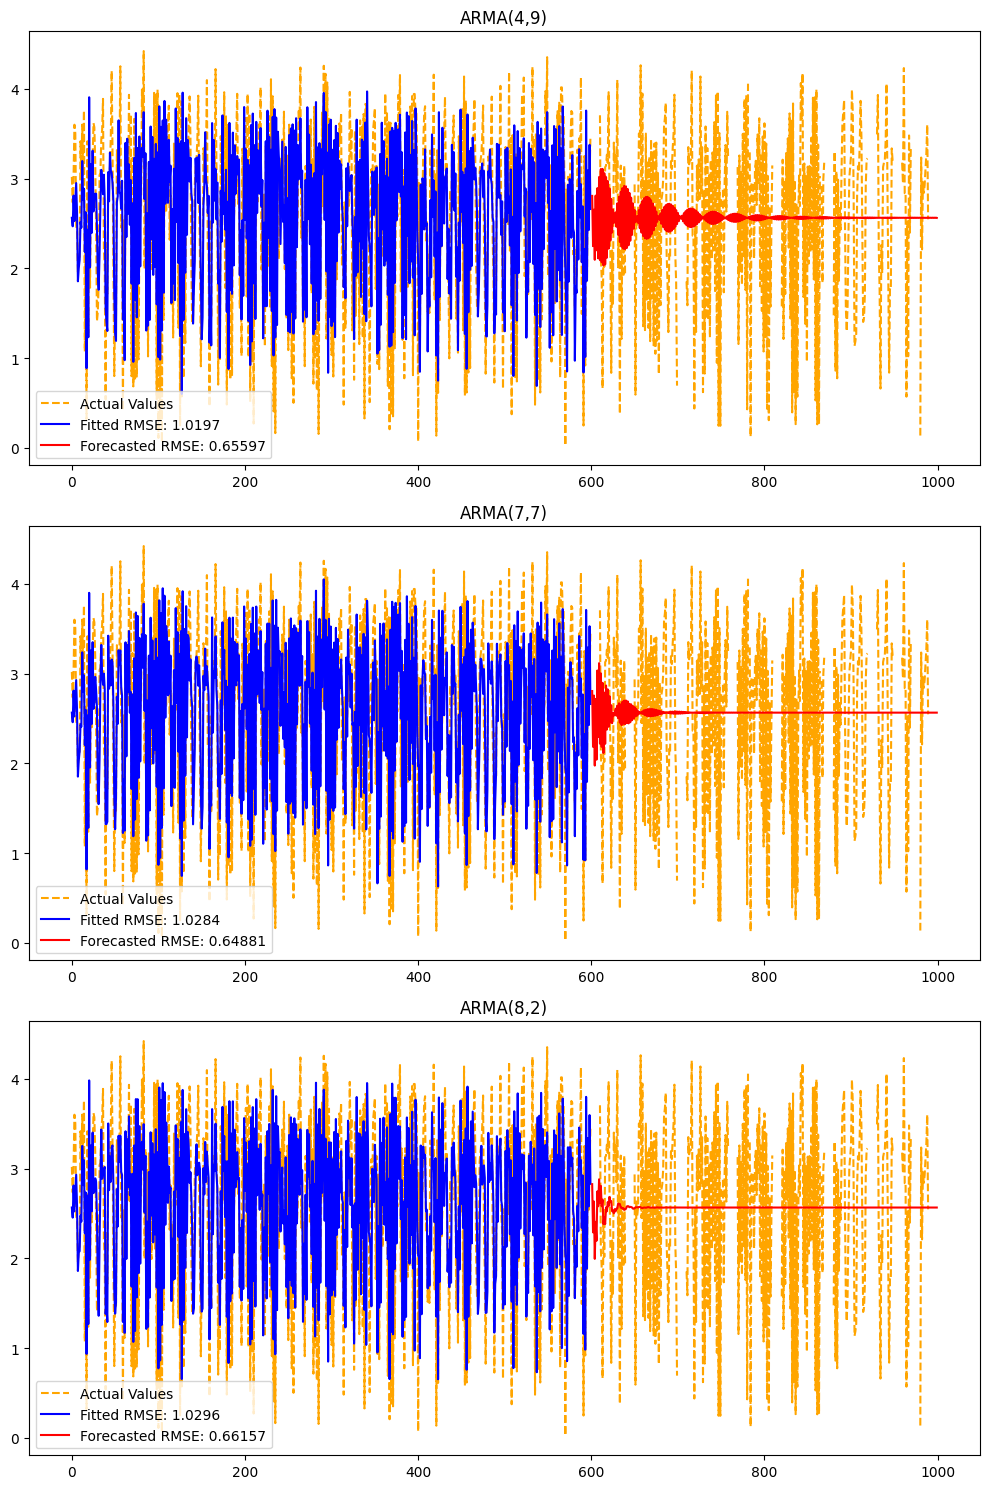

In [ ]:
# Plotting
def calculate_rmse_rms_train(df):
    # Select subset of data where ID > 600 and actual Y is not NaN
    subset = df[(df['ID'] > 600) & (~df['Actual Y'].isna())]

    # Calculate RMSE and RMS
    rmse = np.sqrt(np.mean((subset['Actual Y'] - subset['Forecasted Values'])**2))
    rms = np.sqrt(np.mean(subset['Actual Y']**2))

    return rmse, rms

def calculate_rmse_rms_test(df):
    # Select subset of data where ID > 600 and actual Y is not NaN
    subset = df[(df['ID'] < 600) & (~df['Actual Y'].isna())]

    # Calculate RMSE and RMS
    rmse = np.sqrt(np.mean((subset['Actual Y'] - subset['Fitted Values'])**2))
    rms = np.sqrt(np.mean(subset['Actual Y']**2))

    return rmse, rms

fig, axs = plt.subplots(len(models), 1, figsize=(10, len(models)*5))

for i, (name, result_df_path) in enumerate(zip(models.keys(), [f'{m}_results.csv' for m in models])):
    df = pd.read_csv(result_df_path)

    # Plot actual values
    axs[i].plot(df['ID'], df['Actual Y'], label='Actual Values', color='orange', linestyle='--')

    # Plot train and forecasted values with different colors
    train_part = df[df['ID'] <= 600]
    test_part = df[df['ID'] > 600]
    rmse, rms = calculate_rmse_rms_train(df)
    rmse, rms = calculate_rmse_rms_test(df)
    axs[i].plot(train_part['ID'], train_part['Fitted Values'], label=f'Fitted RMSE: {calculate_rmse_rms_train(df)[0]:.5}', color='blue')
    axs[i].plot(test_part['ID'], test_part['Forecasted Values'], label=f'Forecasted RMSE: {calculate_rmse_rms_test(df)[0]:.5}', color='red')

    axs[i].set_title(name)
    axs[i].legend(loc='lower left')  # Adjust legend position


plt.tight_layout()
plt.show()


Results of Dickey-Fuller Test:
Test Statistic                -7.273724e+00
p-value                        1.564070e-10
#Lags Used                     1.900000e+01
Number of Observations Used    5.800000e+02
Critical Value (1%)           -3.441675e+00
Critical Value (5%)           -2.866536e+00
Critical Value (10%)          -2.569431e+00
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  600
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -775.421
Date:                Wed, 01 May 2024   AIC                           1558.842
Time:                        01:27:43   BIC                           1576.429
Sample:                             0   HQIC                          1565.688
                                - 600                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5686      0.035     73.119      0.000       2.500       2.637
ar.L1         -0.9357      0.022    -41.757      0.000      -0.980      -0.892
ma.L1          0.7124      0.044     16.098      0.0

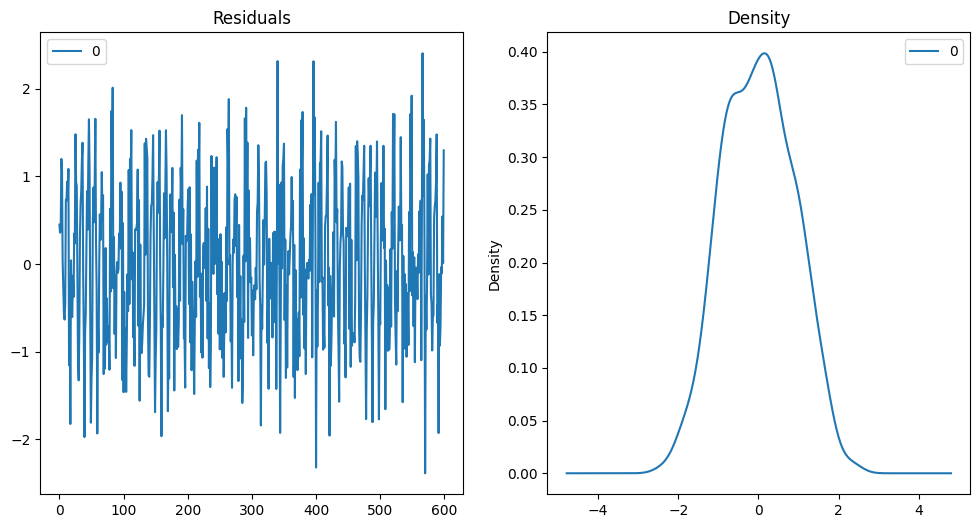

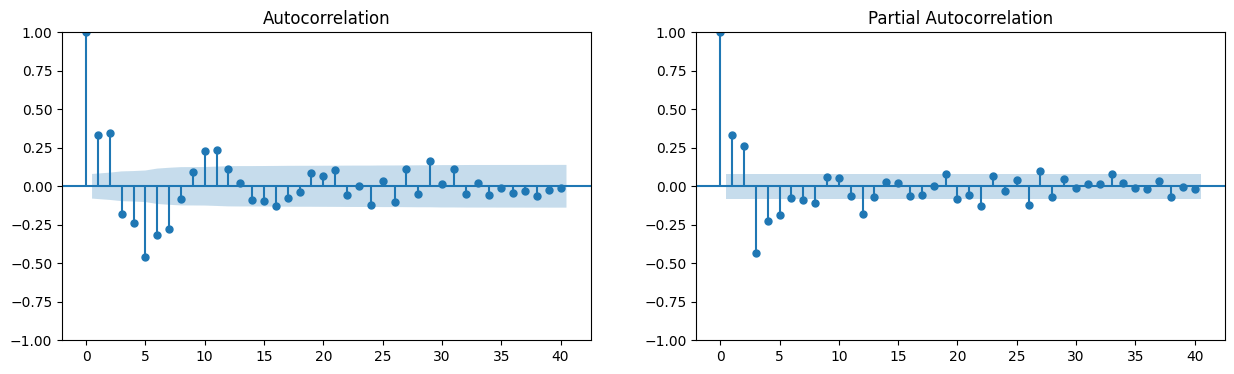

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Function to perform the Augmented Dickey-Fuller test
def test_stationarity(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Check stationarity
test_stationarity(y)

# Fit an ARIMA model (example with p=1, d=0, q=1)
model = ARIMA(y, order=(1, 0, 1))
results = model.fit()

# Print out summary of the model fitting
print(results.summary())

# Plot residuals
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2, figsize=(12, 6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])

# Check residuals for patterns or autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(residuals.values.squeeze(), lags=40, ax=axes[0])
plot_pacf(residuals.values.squeeze(), lags=40, ax=axes[1])
plt.show()
